# Ornstein Uhlenbeck process
An Ornstein Uhlenbeck process is a stochastic process solution to the following differential equation:
$$dX_t = \alpha (\gamma - X_t)dt + \beta dW_t $$

It has a closed form solution which is the following:
$$X_t = X_0e^{-\alpha t} + \gamma (1-e^{-\alpha t}) + \beta e^{-\alpha t}\int_0^t{e^{\alpha s}dW_s} $$
Where $W_t$ is the Wiener process (Brownian motion). 
From this formula we can see how the 3 parameters influence the process:
+ $\alpha$ determines how fast the process converges
+ $\beta$ is the randomness factor. The bigger it is, the more important the brownian motion term is on the process.
+ $\gamma$ is the limit. When $t$ goes to infinity and $\alpha > 0$, $X_t$ goes to $\gamma$

To simulate this process, we approximate the integral by a Riemann sum. for N time steps, we therefore have:
$$\int_0^T{e^{\alpha s}dW_s} \simeq \sum_{k=0}^{N-1}{e^{-\alpha kT/N} (W_{(k+1)T/N} - W_{kT/N})}$$

In [1]:
import numpy as np
from utils import W_increments


# returns an array containing the integral between 0 and t of func(s)dWs for t in [0, T/N, 2T/N, ..., T]
def dW_integral(func, T, N): 
    dW = W_increments(T, N)
    time_steps = np.linspace(0, T, N+1)[:-1]
    f = func(time_steps)
    ans = f*dW
    ans = np.insert(ans, 0, 0)
    return ans.cumsum()

#returns an array conataining [x0, x1, ..., xN] a sample of an OU_process at times [0, T/N, 2T/N, ..., T] 
def OU_process(T, N, x0, alpha, beta, gamma): 
    def exp_alpha(t):
        return np.exp(-alpha*t)

    time_steps = np.linspace(0, T, N+1)

    return x0*exp_alpha(time_steps) + gamma*(1-exp_alpha(time_steps)) + beta*exp_alpha(time_steps)*dW_integral(exp_alpha, T, N)


### Simulations

In [2]:
from matplotlib import pyplot as plt

def plot_simu(T, N, x0, alpha, beta, gamma):
    time_steps = np.linspace(0, T, N+1)
    OU0 = OU_process(T, N, x0, alpha, beta, gamma)
    OU1 = OU_process(T, N, x0, alpha, beta, gamma)
    OU2 = OU_process(T, N, x0, alpha, beta, gamma)

    plt.plot([time_steps[0], time_steps[-1]], [gamma, gamma], color="black")
    plt.plot(time_steps, OU0)
    plt.plot(time_steps, OU1)
    plt.plot(time_steps, OU2)

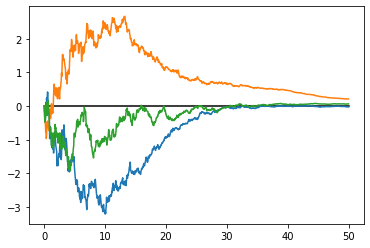

In [3]:
T = 50
N = 1000
x0 = 0
alpha = 0.05
beta = 1
gamma = 0

plot_simu(T, N, x0, alpha, beta, gamma)

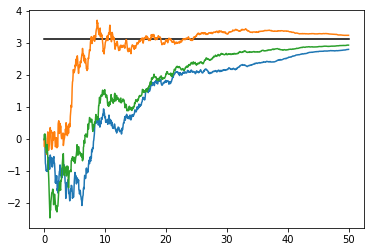

In [4]:
T = 50
N = 1000
x0 = 0
alpha = 0.05
beta = 1
gamma = np.pi

plot_simu(T, N, x0, alpha, beta, gamma)

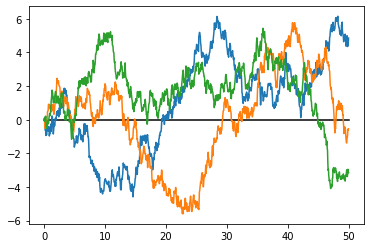

In [6]:
T = 50
N = 1000
x0 = 0
alpha = 0
beta = 1
gamma = 0

plot_simu(T, N, x0, alpha, beta, gamma)

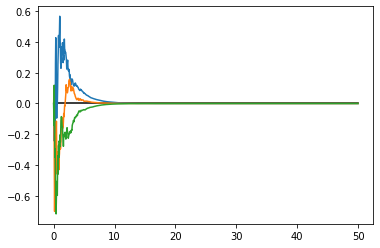

In [8]:
T = 50
N = 1000
x0 = 0
alpha = 0.5
beta = 1
gamma = 0

plot_simu(T, N, x0, alpha, beta, gamma)